In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [99]:
df = pd.read_csv("/content/fatal-police-shootings-data.csv")

In [100]:
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9497 non-null   int64  
 1   date                        9497 non-null   object 
 2   threat_type                 9430 non-null   object 
 3   flee_status                 8199 non-null   object 
 4   armed_with                  9285 non-null   object 
 5   city                        9427 non-null   object 
 6   county                      4775 non-null   object 
 7   state                       9497 non-null   object 
 8   latitude                    8446 non-null   float64
 9   longitude                   8446 non-null   float64
 10  location_precision          8446 non-null   object 
 11  name                        9152 non-null   object 
 12  age                         9110 non-null   float64
 13  gender                      9470 

In [102]:
df.describe()

,id,latitude,longitude,age
count,9497.000000,8446.000000,8.446000e+03,9110.00000
mean,5219.041066,36.641434,-1.066443e+12,37.42371
std,2954.630853,5.338954,9.800835e+13,12.93761
min,3.000000,19.497503,-9.007175e+15,2.00000
25%,2657.000000,33.462314,-1.119961e+02,28.00000
50%,5249.000000,36.077343,-9.434420e+01,35.00000
75%,7787.000000,40.033470,-8.318070e+01,45.00000
max,10284.000000,71.301255,-6.786717e+01,92.00000


The average age for the fetal police shootings is 37 years old. The youngest is 2 years old and the oldest is 92 years old.

In [103]:
df.isnull().sum()
df = df.dropna()

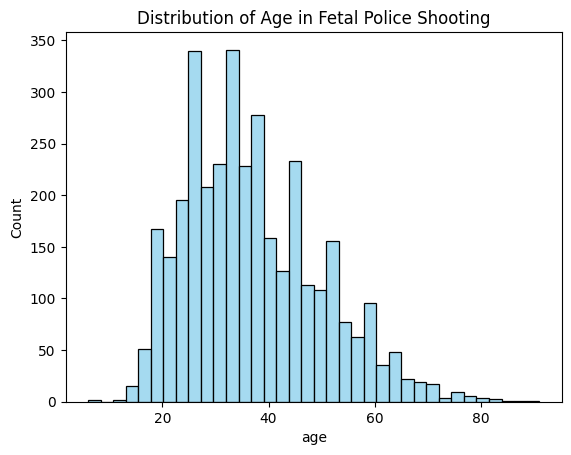

In [105]:
sns.histplot(df['age'], color='skyblue')
plt.title("Distribution of Age in Fetal Police Shooting")
plt.show()

The ages between 20-40 have the highest fetal shootings. There are less fatalities in the older ages.

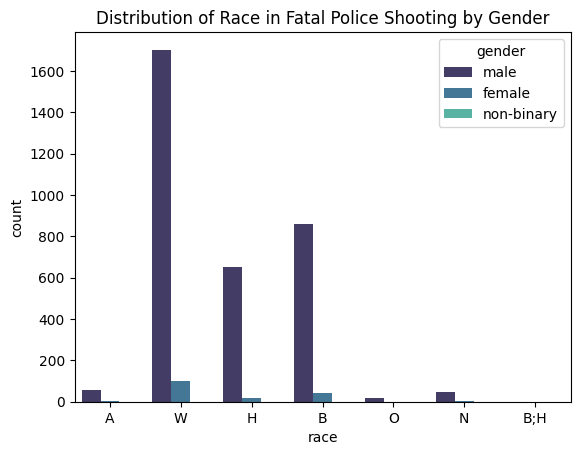

In [123]:
sns.countplot(x='race', hue='gender', data=df, palette= 'mako')
plt.title('Distribution of Race in Fatal Police Shooting by Gender')
plt.show()

The counterplot visualizes the distribution of race in fatal police shooting by gender. The races displayed are A: Asian, W: White, H: Hispanic, B: Black, O: Other, and N: Native American. Looking at this graph, we can tell that there are less fetal shootings in females compared to males. The highest fatality by race is white, and the lowest is other.

In [116]:
shootings_by_flee = df['flee_status'].value_counts().reset_index()
shootings_by_flee.columns = ['flee', 'count']

fig = px.treemap(shootings_by_flee, path=['flee'], values='count', title='Treemap of Police Fatal Shootings Flee Status')
fig.show()

This treemap shows us the flee status of the victims that were fatally shot. Majority of them were not fleeing. The highest method for those that were fleeing was by foot. The second highest was by car and the rest were by others.

Text(0.5, 1.0, 'Flee Status by Race in Fatal Police Shooting')

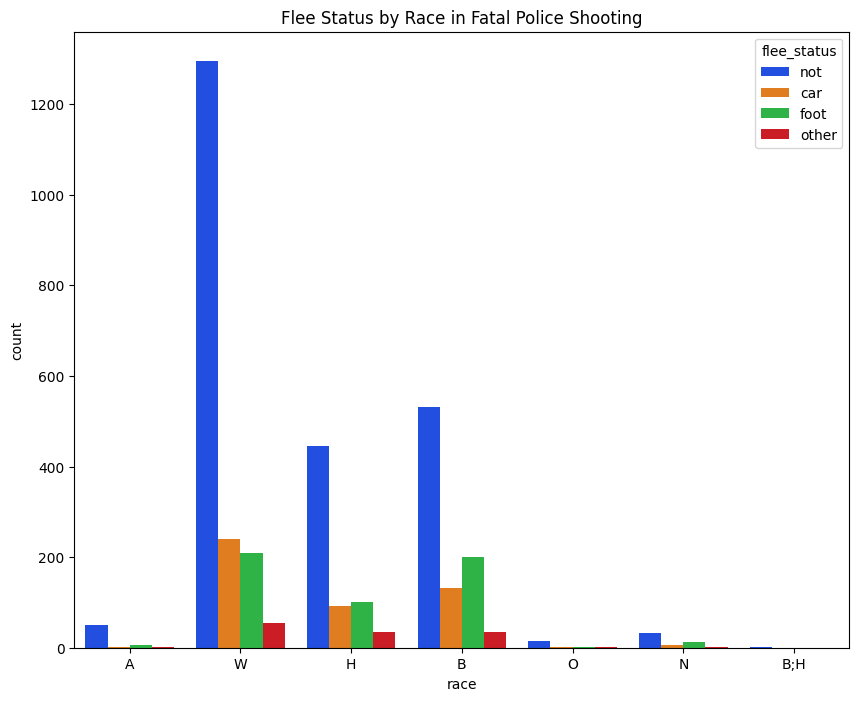

In [113]:
plt.figure(figsize=(10, 8))
sns.countplot(x='race', hue='flee_status', data=df, palette= 'bright')
plt.title("Flee Status by Race in Fatal Police Shooting")


The flee status by race is to analyze if there is any correlation between the two variables. For all the races, the highest count is not feeling. White individuals mostly fleed with a car. Asian, Hispanic, Black, and Native American fled by foot.

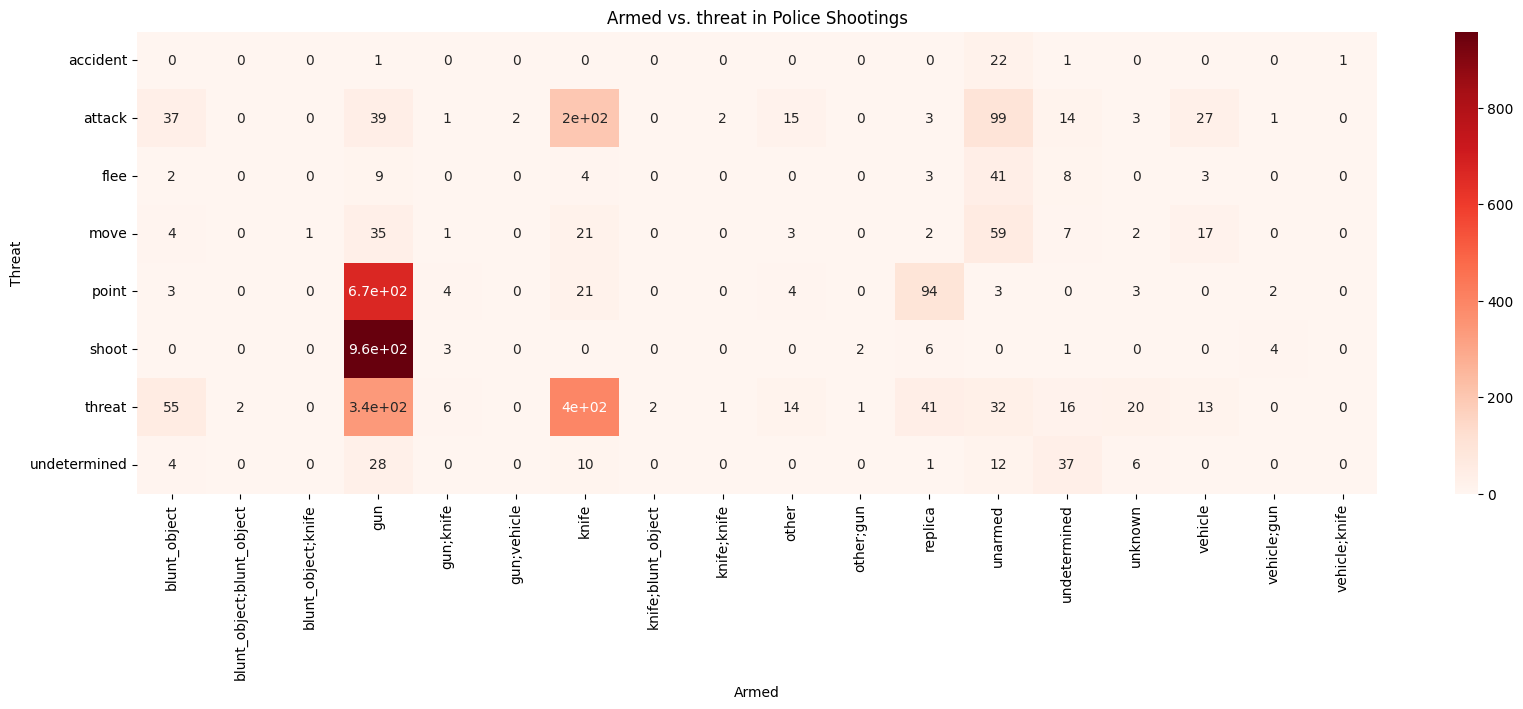

In [108]:
armed_type_group = df.groupby(['threat_type', 'armed_with']).size().unstack().fillna(0)
plt.figure(figsize=(20, 6))
sns.heatmap(armed_type_group, annot=True, cmap="Reds")
plt.title('Armed vs. threat in Police Shootings')
plt.xlabel('Armed')
plt.ylabel('Threat')
plt.show()

The heatmap visualizes the correlation between those that were armed at the time of the shooting and the threat level. Those who were armed with a Gun had the highest threat level. Secondly, those who were armed with a Knife were considered a threat as well.

In [125]:
fig = px.choropleth(shootings_by_state,
                    locations='state',
                    locationmode='USA-states',
                    color='count',
                    hover_name='state',
                    color_continuous_scale="Viridis",
                    title="Choropleth of Police Fatal Shootings by State",
                    scope="usa")

fig.show()

The Choropleth map provides a clear view of the count of fetal shootings throughout the United States. The state with the highest fatality police shooting was California. The second highest was Texas. The third state with the most shootings was Florida.